# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [137]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [54]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [59]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&units=imperial&appid={weather_api_key}'
    
print(city_url)

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?q=bayang&units=imperial&appid=551a234ee6cb8edf2c8dfb3ead8d73b2


In [112]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&units=imperial&appid={weather_api_key}'

        # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

        # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | guerrero negro
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | port saint john's
Processing Record 6 of Set 1 | kogalym
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | dowlatabad
Processing Record 13 of Set 1 | gamay
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | kungur
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | beidao
Processing Record 18 of Set 1 | teknaf
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set

Processing Record 39 of Set 4 | molbergen
Processing Record 40 of Set 4 | mwinilunga
Processing Record 41 of Set 4 | jayapura
Processing Record 42 of Set 4 | labrador city
Processing Record 43 of Set 4 | ketchikan
Processing Record 44 of Set 4 | udalguri
Processing Record 45 of Set 4 | thinadhoo
Processing Record 46 of Set 4 | darwin
Processing Record 47 of Set 4 | notodden
Processing Record 48 of Set 4 | den burg
Processing Record 49 of Set 4 | nuuk
Processing Record 0 of Set 5 | kerema
Processing Record 1 of Set 5 | whitehorse
Processing Record 2 of Set 5 | bowen
Processing Record 3 of Set 5 | puerto baquerizo moreno
Processing Record 4 of Set 5 | bykovo
Processing Record 5 of Set 5 | la ciotat
Processing Record 6 of Set 5 | kayangel
Processing Record 7 of Set 5 | constantia
Processing Record 8 of Set 5 | dodge city
Processing Record 9 of Set 5 | waterford
Processing Record 10 of Set 5 | el bolson
Processing Record 11 of Set 5 | daru
Processing Record 12 of Set 5 | yemel'yanovo
Proce

Processing Record 33 of Set 8 | qarazhal
Processing Record 34 of Set 8 | hasaki
Processing Record 35 of Set 8 | daur
Processing Record 36 of Set 8 | simanggang
Processing Record 37 of Set 8 | khandyga
Processing Record 38 of Set 8 | palikir - national government center
Processing Record 39 of Set 8 | peniche
Processing Record 40 of Set 8 | huambo
Processing Record 41 of Set 8 | la trinite
Processing Record 42 of Set 8 | shenandoah
Processing Record 43 of Set 8 | umm ruwaba
Processing Record 44 of Set 8 | rongelap
Processing Record 45 of Set 8 | lubang
Processing Record 46 of Set 8 | gero
Processing Record 47 of Set 8 | puerto armuelles
Processing Record 48 of Set 8 | olindina
Processing Record 49 of Set 8 | mirny
Processing Record 0 of Set 9 | luderitz
Processing Record 1 of Set 9 | dzhangala
Processing Record 2 of Set 9 | labuan
Processing Record 3 of Set 9 | taoudenni
Processing Record 4 of Set 9 | changyon
Processing Record 5 of Set 9 | crane
Processing Record 6 of Set 9 | nahiyat a

Processing Record 22 of Set 12 | isangel
Processing Record 23 of Set 12 | revda
Processing Record 24 of Set 12 | ulladulla
Processing Record 25 of Set 12 | tazovsky
Processing Record 26 of Set 12 | suva
Processing Record 27 of Set 12 | rio gallegos
Processing Record 28 of Set 12 | tindouf
Processing Record 29 of Set 12 | kon tum
Processing Record 30 of Set 12 | grove
Processing Record 31 of Set 12 | colac
Processing Record 32 of Set 12 | yanchep
Processing Record 33 of Set 12 | tullins
Processing Record 34 of Set 12 | mazatan
Processing Record 35 of Set 12 | lamu
Processing Record 36 of Set 12 | manaure
Processing Record 37 of Set 12 | la'ie
Processing Record 38 of Set 12 | nema
Processing Record 39 of Set 12 | honefoss
Processing Record 40 of Set 12 | kristiansund
Processing Record 41 of Set 12 | puerto colombia
Processing Record 42 of Set 12 | cangucu
Processing Record 43 of Set 12 | taksimo
Processing Record 44 of Set 12 | lincheng
Processing Record 45 of Set 12 | coari
Processing R

In [113]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [118]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,49.01,44,100,11.50,US,1682445754
1,guerrero negro,27.9769,-114.0611,66.42,56,70,10.60,MX,1682445803
2,lompoc,34.6391,-120.4579,64.62,87,40,10.36,US,1682445798
3,talnakh,69.4865,88.3972,34.21,85,84,6.13,RU,1682445940
4,port saint john's,-31.6229,29.5448,71.33,91,97,5.37,ZA,1682445940


In [119]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [120]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,49.01,44,100,11.50,US,1682445754
1,guerrero negro,27.9769,-114.0611,66.42,56,70,10.60,MX,1682445803
2,lompoc,34.6391,-120.4579,64.62,87,40,10.36,US,1682445798
3,talnakh,69.4865,88.3972,34.21,85,84,6.13,RU,1682445940
4,port saint john's,-31.6229,29.5448,71.33,91,97,5.37,ZA,1682445940


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

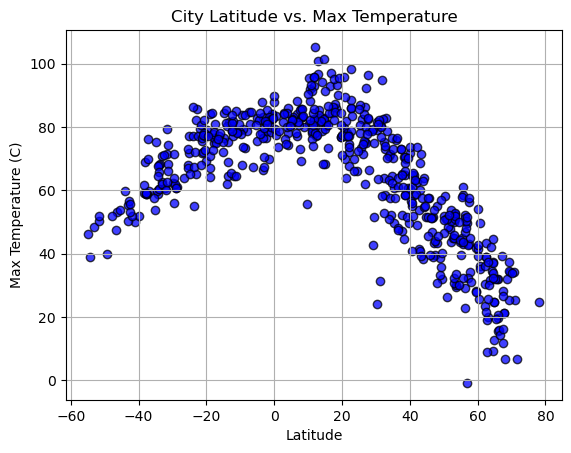

In [121]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, color="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

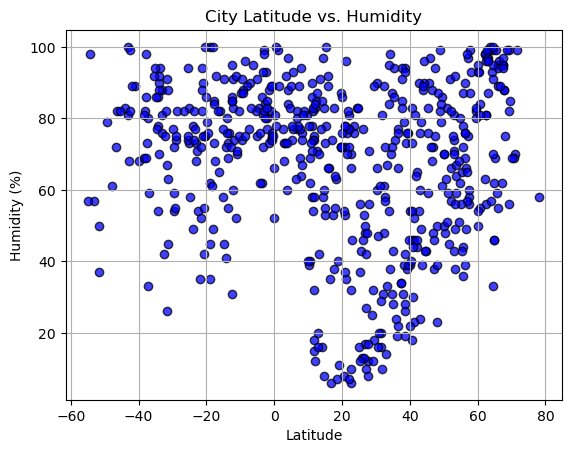

In [122]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, color="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

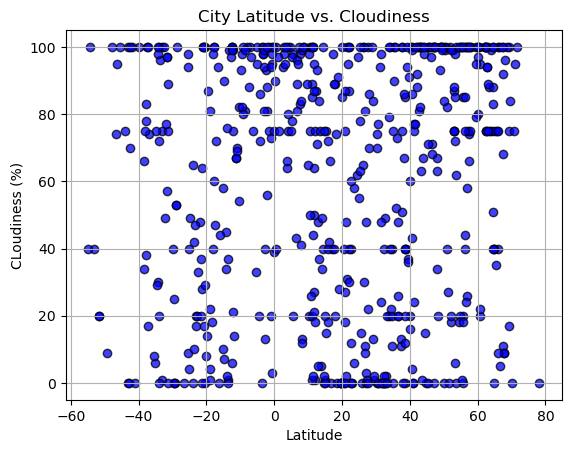

In [123]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, color="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("CLoudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

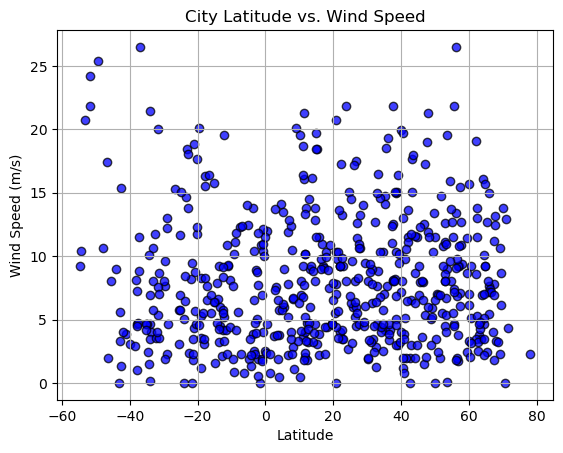

In [124]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, color="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [125]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

In [126]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,49.01,44,100,11.50,US,1682445754
1,guerrero negro,27.9769,-114.0611,66.42,56,70,10.60,MX,1682445803
2,lompoc,34.6391,-120.4579,64.62,87,40,10.36,US,1682445798
3,talnakh,69.4865,88.3972,34.21,85,84,6.13,RU,1682445940
5,kogalym,62.2654,74.4791,30.52,98,100,8.57,RU,1682445940


In [127]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port saint john's,-31.6229,29.5448,71.33,91,97,5.37,ZA,1682445940
6,port-aux-francais,-49.3500,70.2167,39.85,79,9,25.39,TF,1682445940
7,adamstown,-25.0660,-130.1015,77.14,83,4,11.63,PN,1682445796
8,blackmans bay,-43.0167,147.3167,55.53,81,0,5.57,AU,1682445941
9,punta arenas,-53.1500,-70.9167,48.31,57,40,20.71,CL,1682445941


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8724452412633257


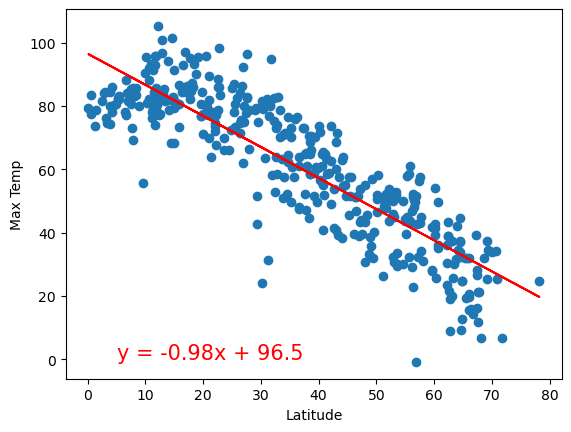

In [134]:
# Linear regression on Northern Hemisphere

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, (5,0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.8072261723584455


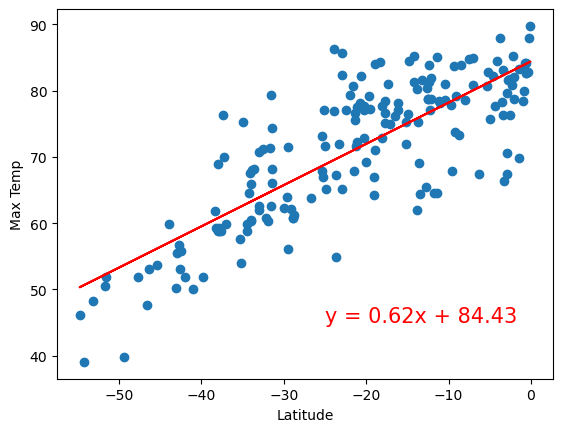

In [136]:
# Linear regression on Southern Hemisphere

x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, (-25,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
- As we can see here presented by the two scatter plots, temperature rises drastically as the latitudes in the northern and southern hemisphere get closer to 0 (the equator).
- Looking at the r-values, we can see that both have a strong correlation between the latitude and temperature.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15690829708544546


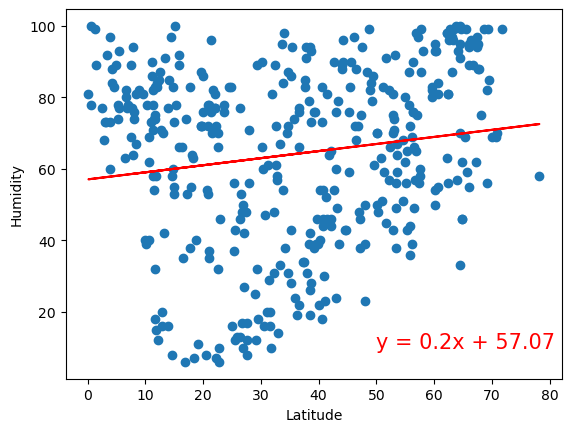

In [130]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, (50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.12200928938138816


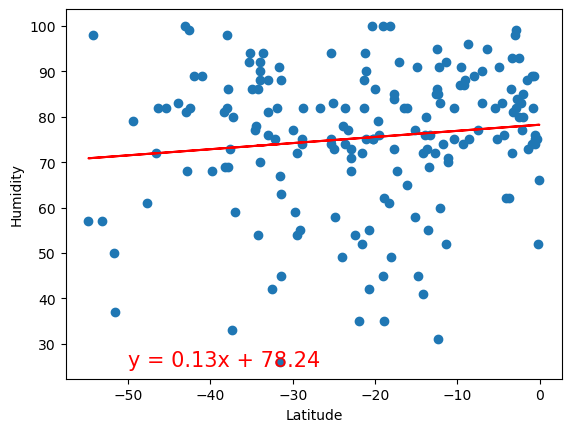

In [131]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, (-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
- Looking at the humidity based on latitudes, it is hard to draw a conclusion as to whether the two are correlated or not.
- Both graphs have low r-values meaning they are not strongly correlated which we can see with the scatter plots as the points seem to be everywhere and the line is almost flat.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12018670453200726


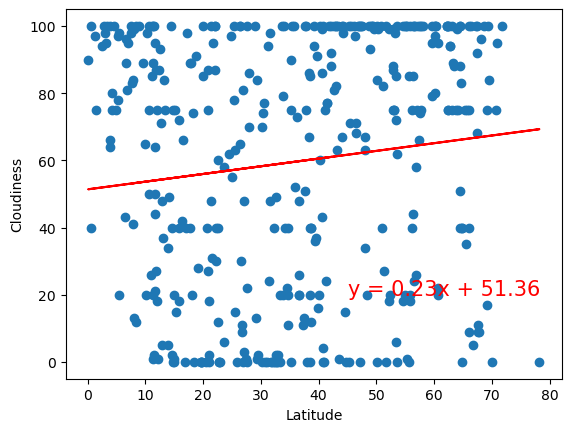

In [133]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, (45,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.07696154076606906


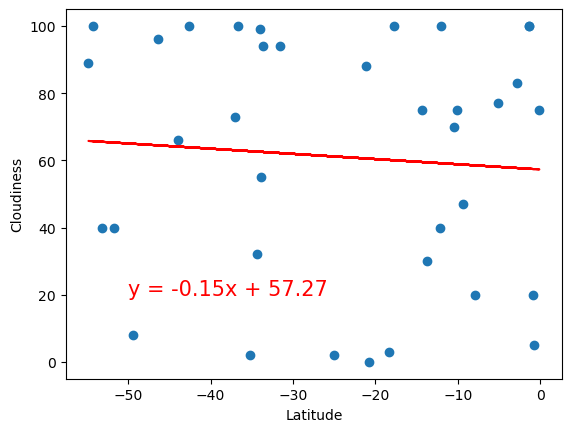

In [106]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, (-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:**
- Similarly to the humidity charts, the cloudiness charts have weak r-values and the cloudiness and latitude seem to be uncorrelated.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.027158540323486812


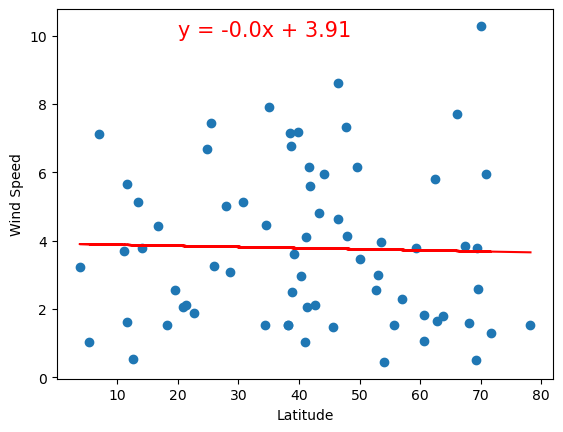

In [111]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, (20,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.3113047142789735


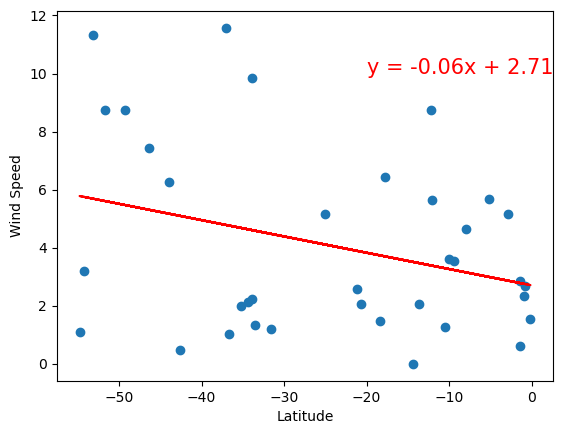

In [109]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, (-20,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
- The wind speed and latitude in the northern hemisphere has a weak r-value, and just by looking at the plot we can determine that there doesn't appear to be any correlation.
- In the southern hemispher, the r-value is still weak but is slightly stronger than the northern hemisphere. There appears to be slightly more correlation between the two values in the southern hemisphere, though the graph is not correlated enough to draw a conclusion that wind speeds are greater the farther south a city is located. 